In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn as sk
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline

In [22]:
dado = pd.read_csv(r"C:\Users\dougl\Desktop\repositorio\repo_local\projeto_eda_covid\Cost_of_Living_Index_by_Country_2024.csv")

In [23]:
dado.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [24]:
dado.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [25]:
dado_sort = dado.sort_values(by='Cost of Living Index',ascending=False)

In [26]:
#As cidades mais caras
maiscaras = dado_sort.head(10)
print(maiscaras[['Country','Cost of Living Index']])

             Country  Cost of Living Index
0        Switzerland                 101.1
1            Bahamas                  85.0
2            Iceland                  83.0
3          Singapore                  76.7
4           Barbados                  76.6
5             Norway                  76.0
6            Denmark                  72.3
7  Hong Kong (China)                  70.8
8      United States                  70.4
9          Australia                  70.2


In [27]:
#As cidades mais baratas
maisbaratas = dado_sort.tail(10)
print(maisbaratas[['Country','Cost of Living Index']])

        Country  Cost of Living Index
111       Nepal                  25.5
112    Paraguay                  25.4
113  Madagascar                  24.5
114       Syria                  24.0
115    Tanzania                  23.8
116  Bangladesh                  22.5
117       India                  21.2
118       Egypt                  21.0
119       Libya                  20.4
120    Pakistan                  18.8


## Visualização

C:\Users\dougl\AppData\Local\Temp\ipykernel_4104\415495206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maiscaras, x='Cost of Living Index', y='Country', palette='viridis')
C:\Users\dougl\AppData\Local\Temp\ipykernel_4104\415495206.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maisbaratas, x='Cost of Living Index', y='Country', palette='viridis')


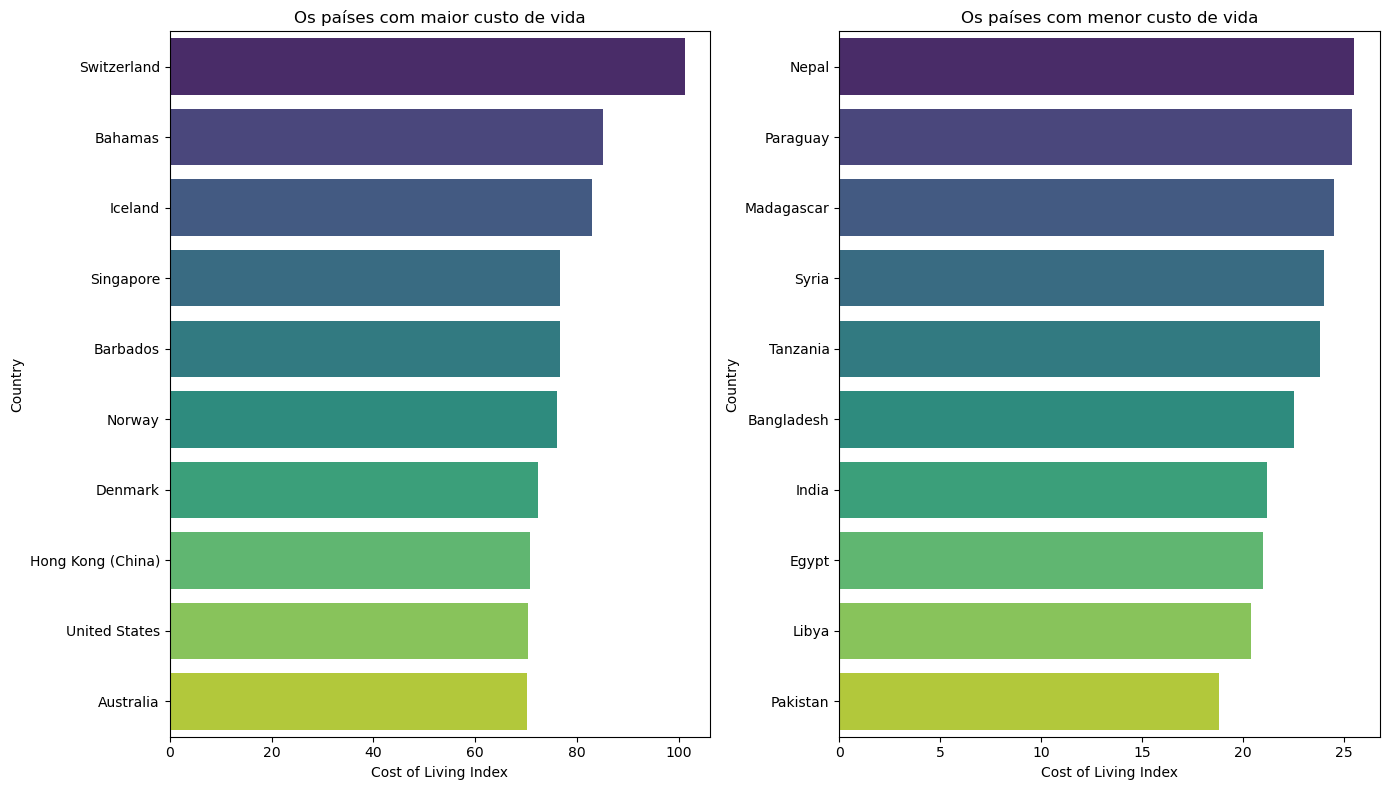

In [28]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.barplot(data=maiscaras, x='Cost of Living Index', y='Country', palette='viridis')
plt.title('Os países com maior custo de vida')
plt.xlabel('Cost of Living Index')


plt.subplot(1,2,2)
sns.barplot(data=maisbaratas, x='Cost of Living Index', y='Country', palette='viridis')
plt.title('Os países com menor custo de vida')
plt.xlabel('Cost of Living Index')

plt.tight_layout()
plt.show()

## Análise das categorias

In [29]:
categorias = ['Groceries Index', 'Restaurant Price Index', 'Rent Index']

C:\Users\dougl\AppData\Local\Temp\ipykernel_4104\2839667731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maiscaras,x=i,y='Country',palette='viridis')


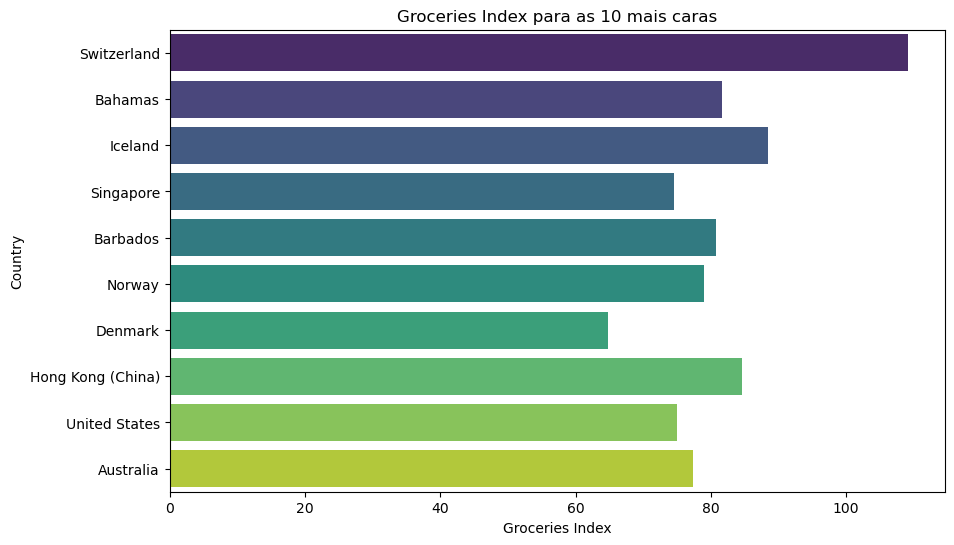

C:\Users\dougl\AppData\Local\Temp\ipykernel_4104\2839667731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maiscaras,x=i,y='Country',palette='viridis')


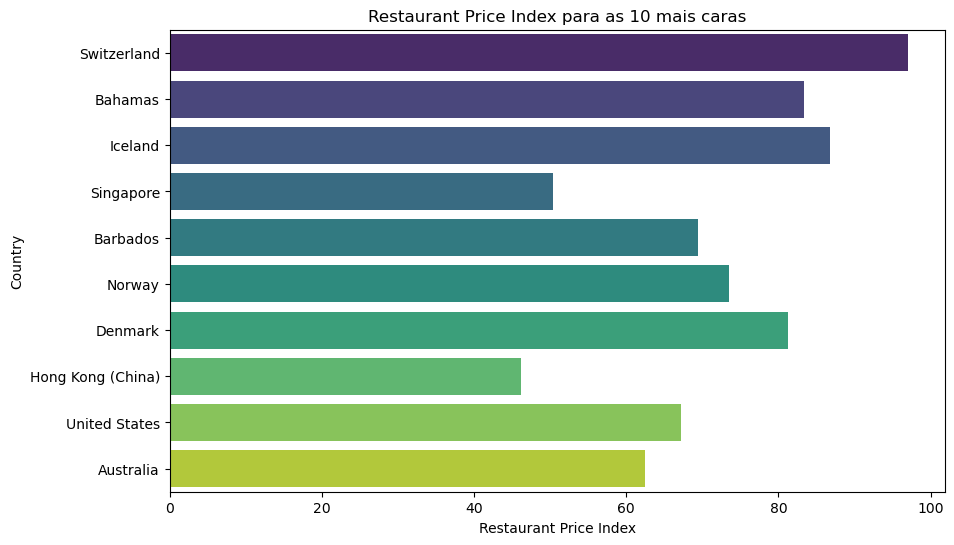

C:\Users\dougl\AppData\Local\Temp\ipykernel_4104\2839667731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maiscaras,x=i,y='Country',palette='viridis')


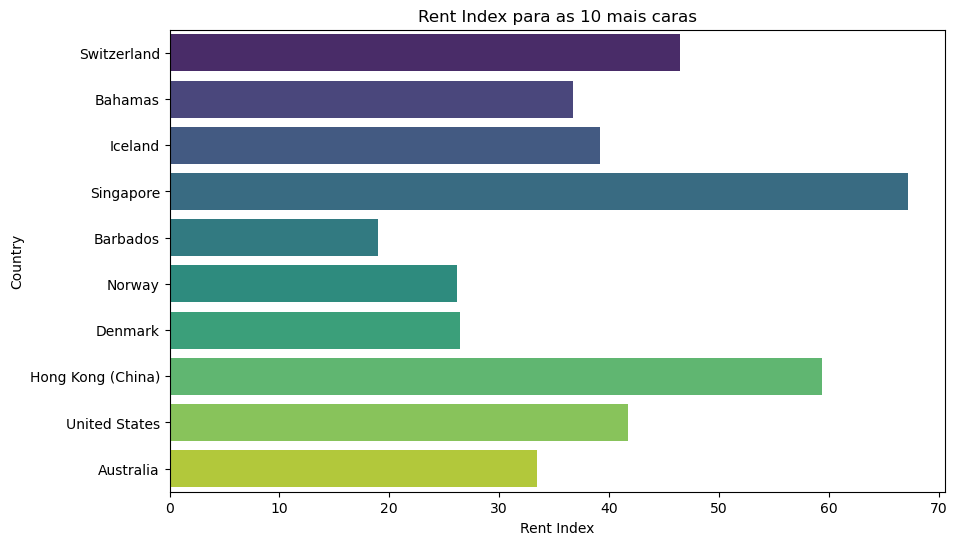

In [30]:
for i in categorias:
    plt.figure(figsize=(10,6))
    sns.barplot(data=maiscaras,x=i,y='Country',palette='viridis')
    plt.title(f'{i} para as 10 mais caras')
    plt.xlabel(i)
    plt.show()

C:\Users\dougl\AppData\Local\Temp\ipykernel_4104\3155815633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maisbaratas,x=i,y='Country',palette='viridis')


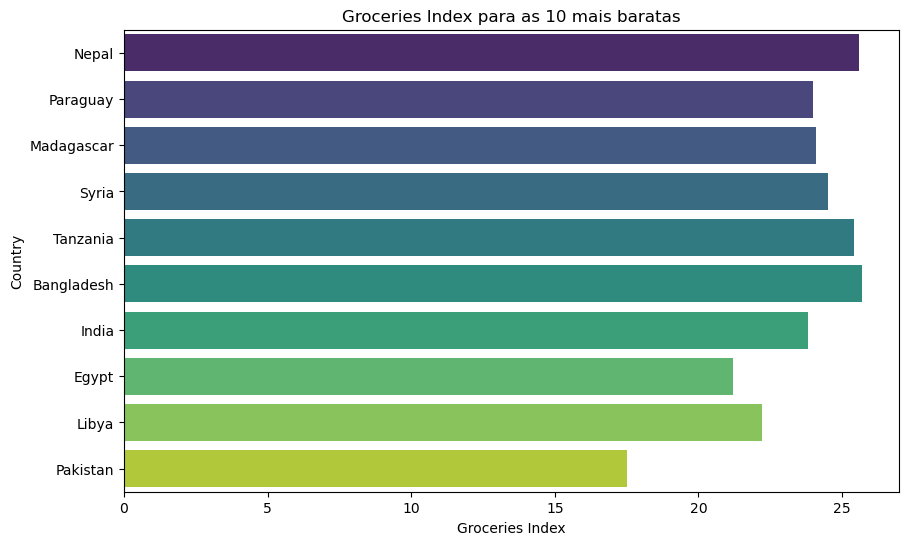

C:\Users\dougl\AppData\Local\Temp\ipykernel_4104\3155815633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maisbaratas,x=i,y='Country',palette='viridis')


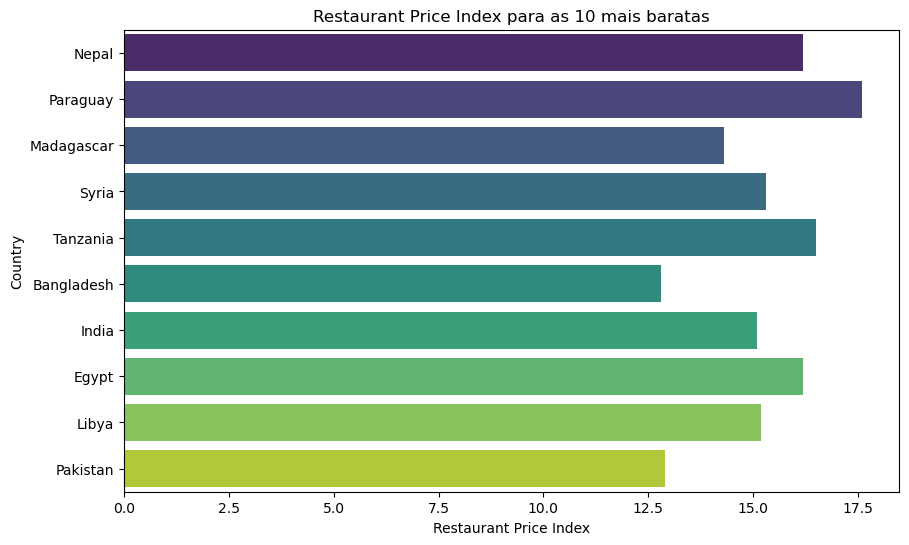

C:\Users\dougl\AppData\Local\Temp\ipykernel_4104\3155815633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maisbaratas,x=i,y='Country',palette='viridis')


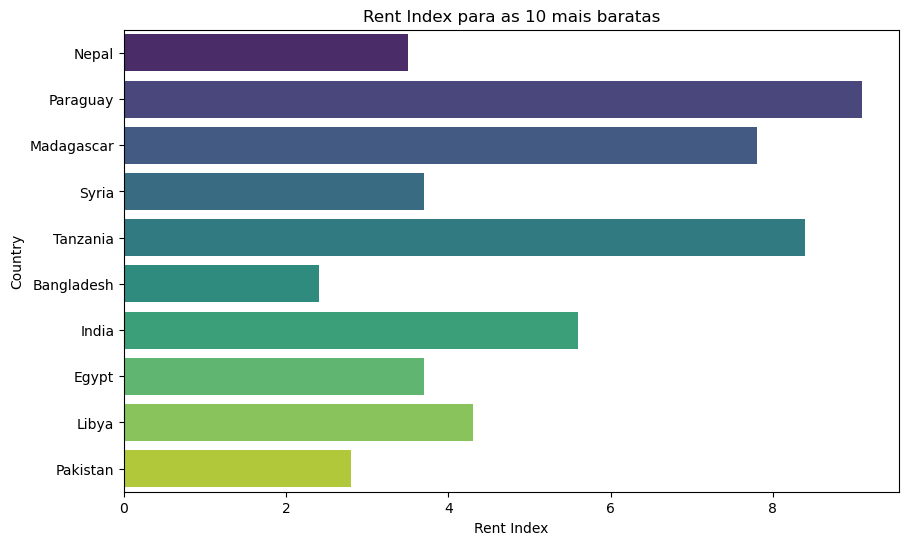

In [31]:
for i in categorias:
    plt.figure(figsize=(10,6))
    sns.barplot(data=maisbaratas,x=i,y='Country',palette='viridis')
    plt.title(f'{i} para as 10 mais baratas')
    plt.xlabel(i)
    plt.show()

## Classificação

In [32]:
def classi_custo(index):
    if index > 80:
        return 'Alto'
    elif index > 40:
        return 'Médio'
    else:
        return 'Baixo'

In [33]:
dado['Cost of Living Class'] = dado['Cost of Living Index'].apply(classi_custo)

In [34]:
features = ['Groceries Index', 'Restaurant Price Index', 'Rent Index']
target = 'Cost of Living Class'

In [35]:
x = dado[features]
y = dado[target]

## Train-Test split e SMOTE ressampling

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [38]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

c:\Users\dougl\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\dougl\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Treinando o modelo

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

## Previsão X Avaliação

In [40]:
y_pred = model.predict(x_test)

In [44]:
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.76
Relatório de classificação:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         1
       Baixo       0.73      0.73      0.73        11
       Médio       0.77      0.77      0.77        13

    accuracy                           0.76        25
   macro avg       0.83      0.83      0.83        25
weighted avg       0.76      0.76      0.76        25



In [47]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, x, y, cv=skf, verbose=0) 
print(f"Cross-Validated Accuracy: {cv_scores.mean()}")

c:\Users\dougl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Accuracy: 0.867


## Hiperparâmetro tunning

In [48]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, verbose=0, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
print("Best Parameters:", grid_search.best_params_)
print("Best Score from Grid Search:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score from Grid Search: 0.9666666666666668
